<span>
<img src="https://cdlib.readthedocs.io/en/latest/_static/cdlogo.png" width="260px" align="right"/>
</span>
<span>
<b>Author:</b> Gurban Aliyev <br/> 
<b>Last update:</b> 21/07/2019
</span>

<a id='top'></a>
# *Community Discovery (Networkx)*

This notebook contains functions of cdlib used for community Discovery

## Table of Contents

1. [Community Discovery Algorithms](#cd)
    1. [K-Cliques](#kc)
    2. [Label Propagation](#lp)
    3. [Louvain](#lv)
    4. [Demon](#dm)
2. [Comparing partitions](#comparing)
    1. [Internal Edge Density](#ied)
    2. [Average Internal Degree](#aid)
    3. [Conductance](#con)
    4. [Normalized Mutual Information (NMI)](#nmi)
3. [LFR: Synthetic networks with planted community structure](#lfr)
4. [Language Distribution of Communities Across Partitions](#dist)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from cdlib import algorithms
import pandas as pd
from cdlib import viz
import networkx as nx
from cdlib import ensemble
from cdlib import evaluation

When there is a problem in codes, it is better to use karate clubs network as our network spends more time

In [6]:
#g = nx.karate_club_graph()

g = nx.read_edgelist("C:\\homework\SNA\Project\SNA_network_links.csv", delimiter=",", nodetype=int)

<a id='cd'></a>
# 1. Community Discovery Algorithms ([to top](#top))

<a id='kc'></a>
### A. K-Cliques ([to top](#top))

Optimization function finds the optimal configuration of the algorithm which maximizes a given fitness function
(i.e. ER modularity)

In [ ]:
k = ensemble.Parameter(name="k", start=3, end=10, step=1)


coms, scoring = ensemble.grid_search(graph=g, method=algorithms.kclique,
                                                     parameters=[k],
                                                     quality_score=evaluation.erdos_renyi_modularity,
                                                     aggregate=max)

print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(coms.communities, coms.method_parameters, scoring))

In [51]:
kc8_coms = algorithms.kclique(g, 8)

In [61]:
# number of communities

len(kc8_coms.communities)

226

In [62]:
# Clustering parameters

kc8_coms.method_parameters

{'k': 8}

In [63]:
# Whether the clustering is overlapping or not

kc8_coms.overlap

True

In [64]:
# Percentage of nodes covered by the clustering

kc8_coms.node_coverage

0.49311531841652323

This is how K-clique partition looks:

C:\Users\qrbal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


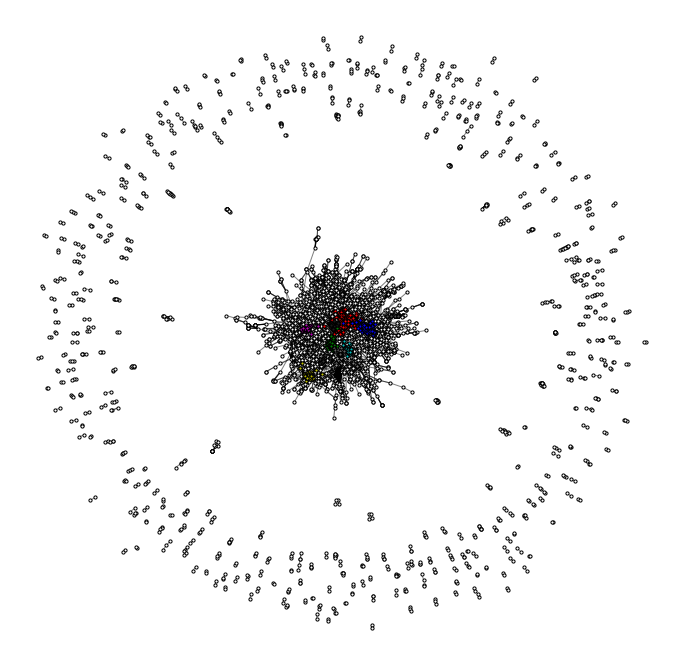

In [65]:
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, kc8_coms, pos, node_size=10, plot_overlaps=False, figsize=(12, 12))

Fitness functions of K-Clique partition:
    1. internal edge density
    2. average internal degree
    3. conductance
    4. ER modularity

In [70]:
kc8_coms.internal_edge_density()

FitnessResult(min=0.0348351029380912, max=0.25, score=0.24426379977200807, std=0.02534215461932579)

In [66]:
kc8_coms.average_internal_degree()

FitnessResult(min=7.0, max=130.42262540021343, score=12.456042681183858, std=12.062073274546435)

In [67]:
kc8_coms.conductance()

FitnessResult(min=0.0, max=0.9733587059942912, score=0.5475939881239397, std=0.2900057206124317)

In [69]:
kc8_coms.erdos_renyi_modularity()

FitnessResult(min=None, max=None, score=0.9144549667053582, std=None)

<a id='lp'></a>
### B. Label Propagation ([to top](#top))

In [16]:
lp_coms = algorithms.label_propagation(g)

In [109]:
len(lp_coms.communities) # Identified Clustering

859

In [159]:
# Clustering parameters

lp_coms.method_parameters

In [160]:
# Whether the clustering is overlapping or not

lp_coms.overlap

False

In [161]:
# Percentage of nodes covered by the partition

lp_coms.node_coverage

1.0

This is how Label Propagation partition looks:

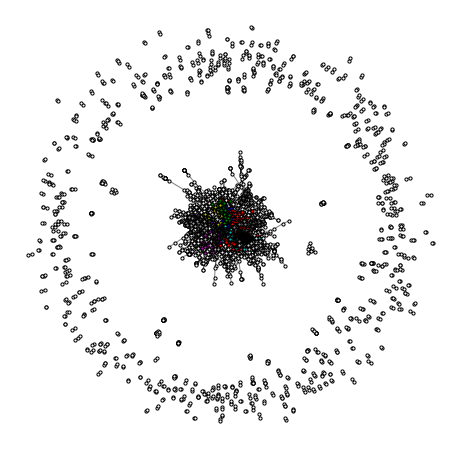

In [162]:
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, lp_coms, pos, node_size=10, plot_overlaps=False, figsize=(8, 8))

Fitness functions:

In [165]:
lp_coms.average_internal_degree()

FitnessResult(min=1.0, max=94.8124501197127, score=3.1032594738136665, std=5.699498421028817)

In [164]:
lp_coms.conductance()

FitnessResult(min=0.0, max=0.8571428571428571, score=0.22950161660686194, std=0.25259824950438503)

In [166]:
lp_coms.internal_edge_density()

FitnessResult(min=0.018932198506332407, max=0.25, score=0.21689196620399892, std=0.05512827699417979)

In [167]:
lp_coms.erdos_renyi_modularity()

FitnessResult(min=None, max=None, score=0.5340651992245158, std=None)

<a id='lv'></a>
### C. Louvain ([to top](#top))

In [ ]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
randomize = ensemble.BoolParameter(name="randomize")

coms, scoring = ensemble.grid_search(graph=g, method=algorithms.louvain,
                                                     parameters=[resolution, randomize],
                                                     quality_score=evaluation.erdos_renyi_modularity,
                                                     aggregate=max)

#print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(coms.communities, coms.method_parameters, scoring))

In [7]:
# Louvain communities

louvain_coms = algorithms.louvain(g, resolution=0.9, randomize=True)

In [73]:
len(louvain_coms.communities) # Identified Clustering

454

In [46]:
# Clustering parameters

louvain_coms.method_parameters

{'weight': 'weight', 'resolution': 0.9, 'randomize': True}

In [47]:
# Whether the clustering is overlapping or not

louvain_coms.overlap

False

In [48]:
# Percentage of nodes covered by the clustering

louvain_coms.node_coverage

1.0

C:\Users\qrbal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


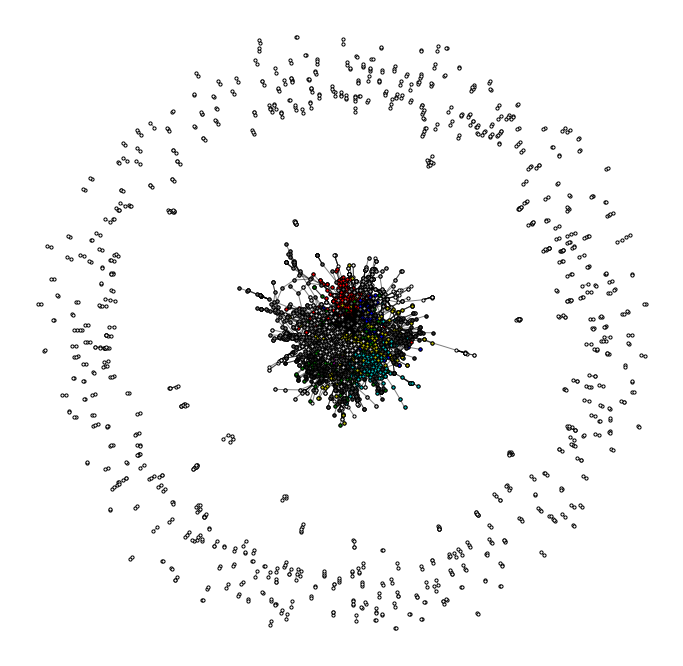

In [54]:
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, louvain_coms, pos, node_size=10, plot_overlaps=False, figsize=(12, 12))

In [55]:
louvain_coms.average_internal_degree()

FitnessResult(min=1.0, max=225.04433497536945, score=3.041276107459377, std=11.301520778988012)

In [56]:
louvain_coms.conductance()

FitnessResult(min=0.0, max=0.42857142857142855, score=0.013766703176676406, std=0.05793297290756672)

In [57]:
louvain_coms.internal_edge_density()

FitnessResult(min=0.006077710685219217, max=0.25, score=0.2254710343706748, std=0.057616468564477934)

In [58]:
louvain_coms.erdos_renyi_modularity()

FitnessResult(min=None, max=None, score=0.8776917533987858, std=None)

<a id='dm'></a>
### D. Demon ([to top](#top))

Instead of grid search, we used random search with 6 instances as Demon algorithm takes much time

In [29]:
epsilon = ensemble.Parameter(name="epsilon", start=0.1, end=3.1, step=0.2)
min_com_size = ensemble.Parameter(name="min_com_size", start=3, end=10, step=1)


coms, scoring = ensemble.random_search(graph=g, method=algorithms.demon,
                                                     parameters=[epsilon, min_com_size],
                                                     quality_score=evaluation.erdos_renyi_modularity, instances=6,
                                                     aggregate=max)

#print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(coms.communities, coms.method_parameters, scoring))

Communities:
 [[0, 3, 29, 30, 32, 159, 167, 234, 303, 318, 379, 400, 415, 459, 577, 610, 696, 699, 813, 913, 1014, 1080, 1087, 1088, 1156, 1182, 1249, 1258, 1297, 1324, 1334, 1341, 1357, 1361, 1367, 1374, 1391, 1406, 1413, 1425, 1442, 1466, 1473, 1482, 1492, 1557, 1566, 1605, 1632, 1642, 1649, 1665, 1669, 1675, 1682, 1699, 1714, 1721, 1733, 1750, 1774, 1781, 1790, 1800, 1865, 1874, 1913, 1940, 1950, 1957, 1973, 1977, 1983, 1990, 2007, 2022, 2029, 2041, 2058, 2082, 2089, 2098, 2108, 2142, 2191, 2376, 2381, 2415, 2418, 2419, 2458, 2484, 2490, 2533, 2541, 2553, 2554, 2561, 2564, 2568, 2569, 2570, 2594, 2602, 2625, 2701, 2747, 2748, 2847, 3068, 3138, 3141, 3142, 3147, 3148, 3149, 3150, 3170, 3183, 3189, 3204, 3208, 3221, 3257, 3258, 3259, 3260, 3265, 3283, 3551, 3557, 3683, 3697, 3703, 3719, 3721, 3726, 3733, 3751, 3753, 3756, 3782, 3785, 3799, 3822, 3827, 3837, 3855, 3941, 4137, 4158, 4159, 4216, 4249, 4388, 4402, 4404, 4417, 4419, 4422, 4423, 4424, 4464, 4469, 4471, 4498, 4503, 4518, 453

Scoring: FitnessResult(min=None, max=None, score=77.24742551692432, std=None)


In [57]:
# Demon communities

demon_coms = algorithms.demon(g, 2.3, 6)

In [32]:
len(demon_coms.communities) # Identified Clustering

2057

In [33]:
# Clustering parameters

demon_coms.method_parameters

{'epsilon': 2.3, 'min_com_size': 6}

In [34]:
# Whether the clustering is overlapping or not

demon_coms.overlap

True

In [35]:
# Percentage of nodes covered by the clustering

demon_coms.node_coverage

0.6500286861732645

C:\Users\qrbal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


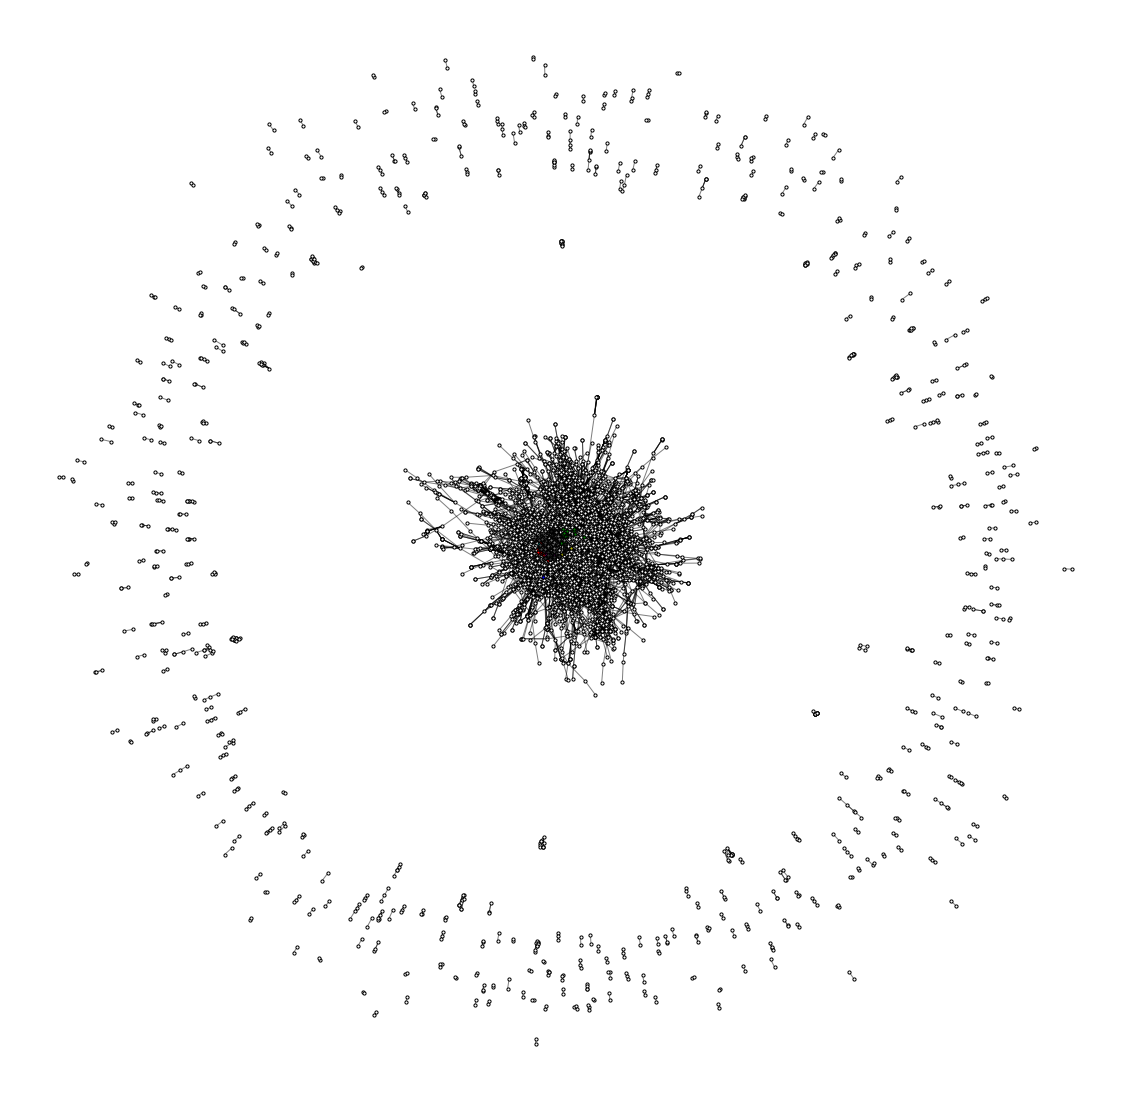

In [31]:
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, demon_coms, pos, node_size=10, plot_overlaps=False, figsize=(20, 20))

Fitness functions:

In [36]:
demon_coms.average_internal_degree()

FitnessResult(min=3.4285714285714284, max=299.0, score=44.27416144762332, std=75.21513585365985)

In [37]:
demon_coms.conductance()

FitnessResult(min=0.0, max=0.9796696315120712, score=0.5242254968694153, std=0.27686488750474775)

In [38]:
demon_coms.internal_edge_density()

FitnessResult(min=0.08111702127659574, max=0.25, score=0.22082461019072783, std=0.03420786013777587)

In [39]:
demon_coms.erdos_renyi_modularity()

FitnessResult(min=None, max=None, score=78.00228034017492, std=None)

<a id='comparing'></a>
# 2. Comparing partitions ([to top](#top))

<a id='ied'></a>
### A. Internal Edge Density ([to top](#top))

Distribution of internal edge density through different cluster sizes

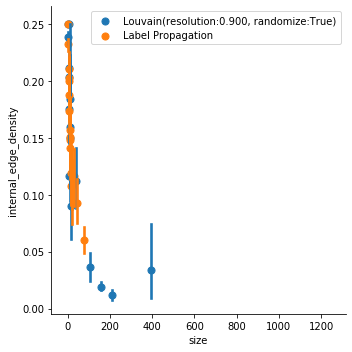

In [138]:
viz.plot_com_properties_relation([louvain_coms, lp_coms], evaluation.size, evaluation.internal_edge_density)

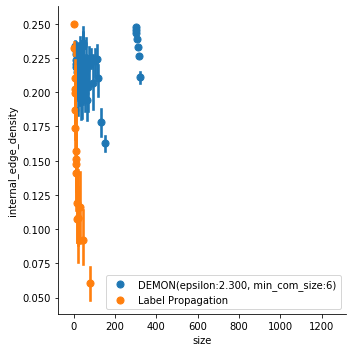

In [139]:
viz.plot_com_properties_relation([demon_coms, lp_coms], evaluation.size, evaluation.internal_edge_density)

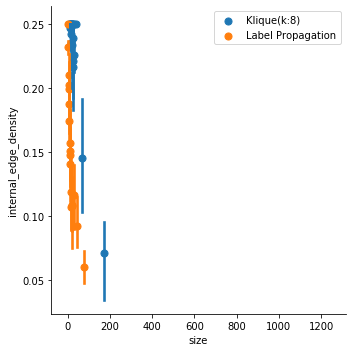

In [140]:
viz.plot_com_properties_relation([kc8_coms, lp_coms], evaluation.size, evaluation.internal_edge_density)

<a id='aid'></a>
### B. Average Internal Degree ([to top](#top))

Distribution of average internal degree through different cluster sizes

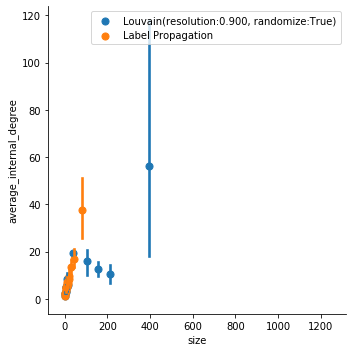

In [147]:
viz.plot_com_properties_relation([louvain_coms, lp_coms], evaluation.size, evaluation.average_internal_degree)

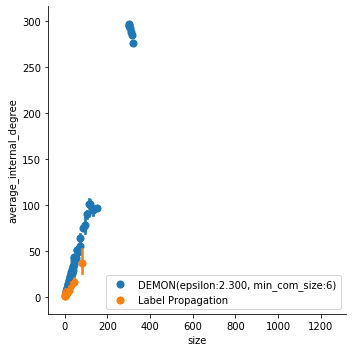

In [148]:
viz.plot_com_properties_relation([demon_coms, lp_coms], evaluation.size, evaluation.average_internal_degree)

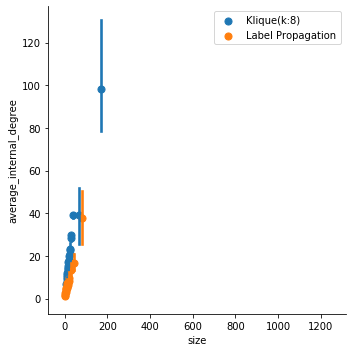

In [149]:
viz.plot_com_properties_relation([kc8_coms, lp_coms], evaluation.size, evaluation.average_internal_degree)

<a id='con'></a>
### C. Conductance ([to top](#top))

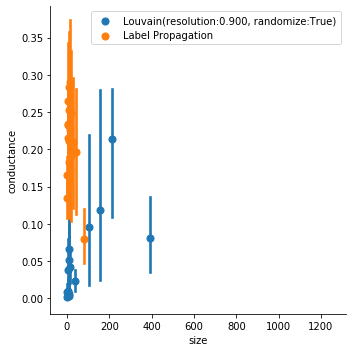

In [151]:
viz.plot_com_properties_relation([louvain_coms, lp_coms], evaluation.size, evaluation.conductance)

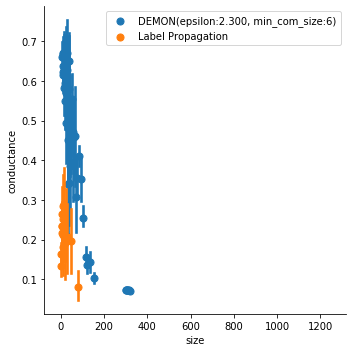

In [152]:
viz.plot_com_properties_relation([demon_coms, lp_coms], evaluation.size, evaluation.conductance)

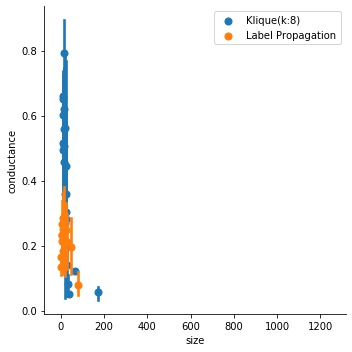

In [153]:
viz.plot_com_properties_relation([kc8_coms, lp_coms], evaluation.size, evaluation.conductance)

<a id='nmi'></a>
### D. Normalized Mutual Information (NMI) ([to top](#top))

In [164]:
louvain_coms.normalized_mutual_information(lp_coms)

C:\Users\qrbal\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


MatchingResult(score=0.7790419208137127, std=None)

<a id='lfr'></a>
# 3. LFR: Synthetic networks with planted community structure ([to top](#top))

C:\Users\qrbal\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\qrbal\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\qrbal\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\qrbal\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use a

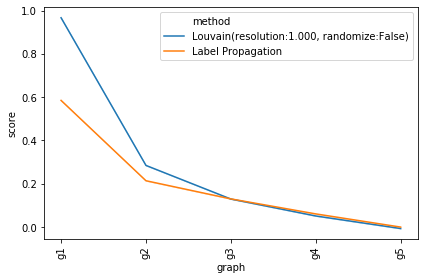

In [3]:
# NMI

from cdlib import NodeClustering

g1 = nx.algorithms.community.LFR_benchmark_graph(1000, 3, 1.5, 0.1, min_community=30, average_degree=5)
g2 = nx.algorithms.community.LFR_benchmark_graph(1000, 3, 1.5, 0.3, min_community=30, average_degree=5)
g3 = nx.algorithms.community.LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=30, average_degree=5)
g4 = nx.algorithms.community.LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=30, average_degree=5)
g5 = nx.algorithms.community.LFR_benchmark_graph(1000, 3, 1.5, 0.9, min_community=30, average_degree=5)

names = ["g1", "g2", "g3", "g4", "g5"]
graphs = [g1, g2, g3, g4, g5]
references = []

# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.louvain, algorithms.label_propagation]

# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

<a id='dist'></a>
# 4. Language Distribution of Communities across partitions ([to top](#top))

In [63]:
import json

jsonfile = louvain_coms.to_json() # json file (changing lp_coms to other partitions gives results of other algorithms)

The variable below returns communities with nodes. We copied nodes of communities 0 and 1 from each partition and found distribution of languages.

In [64]:
jsonfile

'{"communities": [[5, 178, 297, 1207, 1299, 1515, 1607, 1823, 1915, 2495, 2503, 2702, 2704, 2719, 2857, 3708, 4167, 4251, 4258, 4473, 4504, 4514, 4563, 4936, 4971, 5109, 5191, 5792, 5930, 5954, 6007, 6023, 6037, 6052, 6192, 6330, 6478, 6763, 6801, 6817, 6820, 6857, 6871, 7029, 7118, 7124, 7561, 7637, 8457, 8598, 8900, 9222, 9233, 9402, 9603, 9606, 7, 123, 210, 259, 313, 446, 450, 1124, 1175, 1183, 1360, 1488, 1668, 1796, 1976, 2104, 2372, 2421, 2785, 2805, 3464, 3485, 3647, 3696, 3706, 3761, 3773, 3865, 4105, 4203, 4285, 4332, 4357, 4360, 4362, 4477, 4525, 4528, 4537, 4695, 4946, 4964, 4965, 4983, 4984, 4985, 4990, 4991, 4994, 4995, 4997, 5014, 5221, 5289, 5320, 5321, 5325, 5354, 6017, 6024, 6031, 6047, 6056, 6065, 6068, 6070, 6073, 6074, 6197, 6262, 6468, 6636, 6638, 6907, 6915, 7028, 7327, 7465, 7574, 7696, 7774, 7797, 7802, 7891, 8116, 8452, 8554, 8575, 8577, 8595, 8596, 8613, 8758, 8831, 8842, 8932, 8949, 9124, 9600, 9607, 9704, 9911, 10, 5350, 5614, 7464, 8547, 49, 7496, 7657, 61,

In [71]:
louvain_com0 = (3, 8195, 8196, 8201, 11, 8204, 8205, 8203, 8213, 29, 30, 32, 8225, 8226, 8229, 43, 46, 8239, 8250, 63, 8257, 8258, 8262, 8264, 8271, 83, 8275, 8277, 8279, 88, 8281, 8282, 93, 94, 8286, 8289, 8292, 102, 8298, 8300, 8302, 8303, 8304, 8305, 8307, 8308, 8309, 8310, 8313, 8314, 8316, 8317, 8318, 8320, 8322, 133, 141, 142, 144, 8336, 8338, 8340, 8342, 151, 153, 8347, 159, 8355, 167, 8361, 8362, 8363, 170, 172, 8364, 8369, 8370, 179, 8374, 8379, 8381, 8382, 8387, 8388, 8396, 8403, 8404, 8407, 8411, 8412, 8424, 234, 8427, 8428, 8426, 243, 244, 8446, 8451, 260, 271, 274, 8467, 279, 280, 282, 291, 8486, 8494, 303, 8497, 8498, 306, 307, 8503, 318, 320, 327, 331, 336, 340, 341, 344, 348, 358, 359, 364, 373, 379, 388, 390, 396, 400, 404, 405, 410, 8603, 411, 8605, 415, 8608, 417, 418, 431, 8624, 435, 436, 8630, 439, 440, 441, 447, 448, 453, 454, 456, 459, 462, 470, 482, 488, 490, 491, 8684, 493, 501, 503, 8704, 8715, 8718, 8723, 8724, 8728, 8754, 8762, 577, 603, 606, 610, 611, 631, 8829, 8830, 641, 8840, 8843, 8844, 8853, 8859, 686, 8882, 691, 692, 693, 696, 699, 8895, 8896, 8898, 706, 8899, 8908, 8916, 8917, 726, 727, 732, 8925, 8930, 8935, 8958, 9002, 813, 9037, 9039, 9041, 854, 895, 904, 913, 915, 933, 9137, 9138, 9141, 9143, 9144, 9160, 9161, 9164, 9177, 9180, 9182, 9184, 996, 9192, 9194, 1005, 1014, 1016, 9209, 9210, 9217, 9225, 1034, 9236, 9243, 1073, 1075, 1080, 9272, 1085, 9280, 1089, 1093, 1108, 9301, 1130, 1137, 1139, 1142, 1150, 1154, 1156, 1157, 1158, 1176, 1177, 1179, 1180, 1182, 9382, 9383, 9384, 9387, 9390, 9392, 9398, 1216, 9428, 1249, 1253, 1258, 1285, 9478, 9479, 9481, 1297, 1302, 1319, 9518, 1333, 1334, 1341, 1354, 1357, 1359, 1361, 1365, 1367, 9559, 1370, 1373, 1374, 1376, 1377, 1378, 1381, 1382, 1390, 1391, 1393, 1394, 1395, 1400, 1401, 1402, 1403, 1405, 1406, 1408, 1411, 1425, 1428, 1429, 1430, 1433, 1434, 1435, 1442, 1444, 1447, 1451, 1457, 1466, 1469, 1471, 1473, 1485, 1489, 1492, 1496, 1524, 1557, 1561, 1566, 9759, 9770, 9771, 9774, 9776, 9781, 9782, 1593, 9790, 9794, 9796, 1605, 9802, 1610, 9805, 9809, 9811, 9813, 9815, 9816, 1627, 9826, 9832, 9833, 1642, 1641, 9837, 9838, 1649, 9850, 1662, 9856, 1665, 9858, 1667, 9857, 1669, 1673, 1675, 1678, 1681, 1682, 9873, 1684, 1685, 1686, 1689, 1690, 1698, 1699, 1701, 1702, 1703, 1708, 1709, 1710, 1711, 1713, 1714, 1716, 1719, 1733, 1736, 1737, 9930, 1738, 9932, 1741, 1742, 9935, 1743, 9936, 1750, 9942, 1752, 1755, 1759, 9952, 9956, 1765, 9960, 9964, 1774, 9967, 9969, 1777, 1779, 9972, 1781, 9973, 9980, 9981, 1793, 9987, 1797, 9990, 1800, 1804, 1832, 1865, 1869, 1874, 1901, 1913, 1918, 1935, 1949, 1950, 1957, 1970, 1973, 1975, 1977, 1981, 1983, 1986, 1989, 1990, 1992, 1993, 1994, 1997, 1998, 2006, 2007, 2009, 2010, 2011, 2016, 2017, 2018, 2019, 2021, 2022, 2024, 2027, 2041, 2044, 2045, 2046, 2049, 2050, 2051, 2058, 2060, 2063, 2067, 2073, 2082, 2085, 2087, 2089, 2101, 2105, 2108, 2112, 2114, 2142, 2144, 2170, 2191, 2269, 2275, 2316, 2343, 2347, 2363, 2376, 2381, 2393, 2398, 2399, 2401, 2408, 2410, 2415, 2417, 2418, 2419, 2420, 2450, 2458, 2467, 2471, 2475, 2484, 2490, 2493, 2496, 2498, 2513, 2515, 2529, 2533, 2541, 2543, 2544, 2554, 2555, 2559, 2561, 2564, 2566, 2568, 2569, 2570, 2571, 2576, 2581, 2583, 2584, 2585, 2587, 2588, 2594, 2603, 2608, 2610, 2622, 2624, 2625, 2634, 2651, 2680, 2689, 2691, 2699, 2701, 2728, 2746, 2747, 2748, 2767, 2824, 2842, 2847, 3068, 3097, 3123, 3127, 3138, 3141, 3142, 3147, 3148, 3149, 3150, 3154, 3163, 3167, 3168, 3169, 3170, 3172, 3174, 3175, 3183, 3189, 3190, 3194, 3196, 3201, 3204, 3208, 3212, 3216, 3221, 3235, 3239, 3240, 3241, 3244, 3245, 3251, 3253, 3257, 3258, 3259, 3260, 3261, 3263, 3265, 3271, 3273, 3274, 3279, 3283, 3291, 3499, 3515, 3521, 3547, 3551, 3553, 3557, 3558, 3561, 3562, 3564, 3565, 3566, 3570, 3576, 3586, 3593, 3597, 3600, 3603, 3604, 3605, 3621, 3627, 3638, 3646, 3648, 3654, 3660, 3663, 3664, 3666, 3675, 3677, 3678, 3681, 3683, 3697, 3701, 3702, 3703, 3705, 3710, 3711, 3714, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3724, 3726, 3728, 3733, 3741, 3743, 3748, 3751, 3752, 3753, 3756, 3768, 3769, 3776, 3782, 3785, 3786, 3787, 3794, 3799, 3814, 3816, 3818, 3819, 3822, 3825, 3826, 3827, 3829, 3831, 3837, 3854, 3855, 3856, 3858, 3892, 3913, 3914, 3916, 3919, 3925, 3941, 3946, 3981, 4016, 4026, 4027, 4040, 4111, 4140, 4143, 4158, 4159, 4163, 4169, 4174, 4176, 4215, 4216, 4220, 4221, 4223, 4224, 4230, 4249, 4289, 4292, 4293, 4301, 4307, 4308, 4309, 4314, 4315, 4328, 4329, 4331, 4335, 4340, 4341, 4342, 4345, 4349, 4350, 4363, 4364, 4370, 4383, 4385, 4388, 4389, 4400, 4402, 4403, 4404, 4417, 4419, 4422, 4423, 4424, 4439, 4457, 4460, 4464, 4466, 4468, 4469, 4471, 4485, 4487, 4490, 4498, 4503, 4513, 4518, 4529, 4533, 4536, 4539, 4542, 4544, 4552, 4566, 4584, 4597, 4599, 4615, 4621, 4630, 4634, 4644, 4647, 4649, 4652, 4655, 4657, 4659, 4661, 4662, 4663, 4682, 4683, 4706, 4707, 4710, 4712, 4717, 4719, 4721, 4723, 4733, 4739, 4746, 4749, 4755, 4765, 4770, 4772, 4779, 4790, 4791, 4792, 4798, 4802, 4819, 4823, 4825, 4827, 4835, 4837, 4839, 4841, 4843, 4844, 4848, 4851, 4852, 4854, 4855, 4857, 4860, 4861, 4862, 4864, 4866, 4868, 4869, 4871, 4876, 4884, 4890, 4892, 4896, 4897, 5001, 5012, 5016, 5041, 5043, 5044, 5045, 5091, 5099, 5106, 5112, 5132, 5133, 5138, 5153, 5160, 5163, 5182, 5250, 5252, 5255, 5260, 5261, 5265, 5268, 5270, 5271, 5274, 5279, 5316, 5326, 5327, 5332, 5334, 5336, 5343, 5345, 5348, 5349, 5351, 5353, 5357, 5358, 5359, 5361, 5374, 5438, 5451, 5458, 5463, 5464, 5466, 5478, 5485, 5487, 5489, 5491, 5498, 5501, 5505, 5517, 5519, 5523, 5525, 5526, 5530, 5531, 5533, 5544, 5545, 5552, 5557, 5558, 5616, 5668, 5673, 5680, 5703, 5705, 5716, 5718, 5719, 5722, 5723, 5724, 5725, 5727, 5728, 5730, 5735, 5745, 5746, 5747, 5748, 5757, 5759, 5761, 5762, 5767, 5768, 5777, 5787, 5793, 5798, 5886, 5904, 5947, 5960, 5975, 5976, 5979, 5981, 5984, 5985, 5996, 5997, 5998, 5999, 6002, 6086, 6088, 6099, 6102, 6103, 6104, 6117, 6134, 6151, 6153, 6154, 6155, 6156, 6157, 6158, 6161, 6162, 6165, 6171, 6172, 6174, 6177, 6178, 6188, 6189, 6190, 6247, 6252, 6295, 6364, 6402, 6420, 6427, 6430, 6431, 6435, 6444, 6445, 6448, 6451, 6454, 6461, 6462, 6464, 6471, 6474, 6479, 6483, 6487, 6488, 6493, 6498, 6499, 6501, 6504, 6510, 6511, 6514, 6519, 6523, 6528, 6530, 6532, 6533, 6540, 6545, 6549, 6556, 6557, 6559, 6562, 6565, 6568, 6570, 6572, 6573, 6575, 6592, 6598, 6603, 6604, 6612, 6616, 6618, 6621, 6622, 6631, 6632, 6635, 6637, 6643, 6654, 6659, 6665, 6666, 6672, 6674, 6681, 6684, 6695, 6696, 6699, 6701, 6703, 6716, 6743, 6752, 6770, 6771, 6839, 6843, 6846, 6876, 6883, 6908, 6911, 6929, 6938, 6941, 6942, 6947, 6953, 6954, 6981, 6991, 6992, 6993, 6997, 7017, 7018, 7020, 7022, 7025, 7030, 7031, 7032, 7034, 7036, 7037, 7039, 7040, 7042, 7043, 7061, 7064, 7066, 7068, 7089, 7139, 7166, 7256, 7263, 7264, 7268, 7272, 7277, 7284, 7296, 7298, 7300, 7313, 7317, 7320, 7328, 7335, 7353, 7355, 7359, 7360, 7367, 7375, 7376, 7377, 7382, 7401, 7409, 7412, 7416, 7420, 7425, 7427, 7429, 7431, 7435, 7436, 7437, 7438, 7443, 7456, 7459, 7461, 7463, 7478, 7487, 7489, 7506, 7508, 7604, 7658, 7660, 7661, 7663, 7675, 7680, 7686, 7690, 7698, 7712, 7713, 7751, 7753, 7761, 7769, 7772, 7790, 7796, 7810, 7817, 7825, 7832, 7873, 7906, 7907, 7908, 7909, 7916, 7918, 8013, 8019, 8020, 8021, 8022, 8024, 8026, 8032, 8039, 8056, 8062, 8068, 8071, 8075, 8077, 8080, 8081, 8132, 8136, 8151, 8152, 8153, 8156, 8159, 8160, 8169)

In [49]:
louvain_com1 = (1, 7171, 4, 2565, 6, 9223, 7175, 9224, 522, 8199, 2061, 14, 9232, 8209, 5650, 6677, 9239, 8218, 5659, 9756, 9757, 2592, 2593, 9761, 4640, 37, 8742, 8231, 8744, 4650, 8748, 3629, 4653, 2095, 3631, 8749, 1580, 563, 9778, 9780, 566, 1079, 568, 571, 8251, 2110, 7745, 2117, 3657, 3658, 7244, 588, 3662, 2639, 7248, 2640, 2641, 2643, 6227, 7253, 1616, 3665, 8280, 2644, 1114, 7255, 7260, 7261, 7262, 1635, 7276, 2158, 7281, 9844, 7287, 6263, 7801, 1658, 7803, 1155, 643, 7302, 7306, 9355, 6795, 5774, 5775, 7828, 9883, 9884, 3740, 1181, 3745, 3746, 1187, 8868, 9893, 2213, 4773, 9899, 9900, 4782, 3759, 3765, 700, 1217, 708, 1222, 8903, 714, 1739, 718, 8911, 3280, 3793, 7381, 3287, 9944, 1753, 730, 729, 9945, 731, 4318, 4311, 3800, 5346, 228, 6888, 6891, 9965, 6895, 9968, 9970, 9971, 7925, 4343, 1272, 1787, 2812, 2813, 7934, 2811, 4351, 5378, 2820, 9989, 9992, 9993, 6410, 1802, 2825, 2829, 2828, 2826, 8976, 4368, 3346, 4883, 8979, 6924, 6422, 6423, 6935, 6936, 2838, 3350, 6428, 1308, 7457, 6434, 5411, 7458, 6437, 6438, 6439, 1833, 1838, 1327, 9006, 6449, 6958, 2605, 7991, 6456, 5943, 6458, 6459, 6463, 7488, 8004, 8005, 1350, 8010, 6476, 6477, 6480, 8017, 5971, 6484, 5974, 6490, 5980, 1888, 6500, 6502, 5479, 6506, 5995, 363, 6508, 8045, 7026, 6515, 8052, 6525, 8063, 8064, 6529, 6527, 6531, 1924, 7044, 6534, 6535, 5503, 6539, 6541, 6542, 6543, 6544, 6547, 2453, 4501, 1943, 6550, 6551, 1431, 6555, 2460, 4505, 5534, 6552, 2465, 1445, 5548, 1966, 6574, 2481, 7090, 6590, 1479, 5063, 1494, 3545, 7130, 3548, 2527, 8164, 9190, 3559, 1525, 1530, 2047)

In [54]:
kc_com0 = (0, 2049, 2050, 8195, 3, 2051, 8201, 2058, 8203, 2060, 8205, 6158, 4111, 6160, 6153, 6154, 8211, 6155, 8213, 6157, 6162, 2067, 8217, 6171, 6172, 29, 30, 6174, 2080, 8225, 6178, 2082, 32, 8226, 8233, 4137, 2089, 4140, 6189, 6190, 4143, 8239, 43, 2098, 2105, 8250, 2108, 8254, 4159, 2112, 8257, 4158, 8258, 2114, 8271, 83, 8278, 8279, 6236, 2142, 94, 8289, 6251, 8300, 6252, 8302, 8303, 8304, 8306, 8307, 8308, 8309, 8310, 4215, 4216, 8313, 5722, 6267, 8316, 8317, 8318, 4220, 4224, 4221, 4230, 2191, 4244, 8340, 6294, 6295, 6296, 153, 4249, 8347, 8354, 167, 8361, 170, 8362, 1662, 8363, 4270, 179, 8373, 8376, 8378, 8380, 8381, 8385, 4289, 8387, 8388, 4293, 4292, 8396, 4301, 8402, 8404, 4314, 4315, 2269, 2275, 4329, 234, 8427, 8428, 4335, 243, 244, 4341, 4342, 4340, 4349, 4350, 8446, 8451, 260, 8453, 2313, 4363, 2316, 4370, 8466, 6420, 4381, 6430, 6431, 4384, 291, 6436, 4389, 6435, 4388, 4393, 6444, 6445, 303, 6448, 4400, 8498, 4402, 8499, 4404, 306, 8503, 6454, 2363, 6461, 318, 4417, 4419, 6469, 6470, 4423, 2376, 4422, 6474, 6475, 331, 4424, 2381, 6479, 336, 6485, 6487, 6488, 2393, 348, 2398, 2401, 355, 6501, 6504, 2410, 4460, 2415, 4464, 6511, 2418, 2417, 2420, 4469, 2419, 379, 7810, 6530, 6532, 6533, 390, 6538, 4490, 400, 2450, 4498, 405, 4503, 2458, 8603, 6556, 6557, 411, 8605, 415, 417, 4513, 6558, 6565, 4518, 2471, 6570, 6572, 6573, 8622, 431, 8624, 6575, 8627, 2484, 4533, 8630, 4536, 2490, 2493, 447, 2498, 6598, 4552, 4560, 2513, 2515, 470, 6616, 6617, 479, 2529, 2533, 487, 6632, 6633, 490, 6635, 8684, 2541, 6637, 4590, 493, 491, 6643, 4599, 2553, 2554, 6653, 6654, 2559, 2561, 2564, 2568, 6665, 2569, 2571, 2570, 4621, 8718, 6672, 8724, 2581, 8728, 2584, 6684, 2594, 4644, 6694, 6696, 4649, 2602, 4652, 6701, 4655, 2608, 2610, 8754, 4659, 4661, 4662, 8762, 570, 2622, 575, 576, 577, 578, 2623, 579, 2625, 585, 586, 587, 4683, 4682, 2638, 589, 6743, 2651, 606, 6752, 608, 610, 4706, 4707, 4712, 4716, 4717, 6764, 6765, 4721, 6770, 6771, 4723, 2680, 8828, 8829, 4733, 4736, 641, 8834, 2691, 8835, 8840, 6792, 8843, 2699, 4749, 2701, 4755, 8853, 8859, 4770, 4772, 2726, 686, 8882, 691, 692, 693, 4790, 4791, 4792, 696, 699, 2747, 2748, 6846, 8895, 8896, 4802, 8899, 8898, 706, 6858, 6867, 8916, 8917, 4823, 727, 4825, 4827, 6876, 8925, 8930, 4835, 6883, 4841, 4844, 4851, 4852, 4853, 4854, 8951, 4855, 4857, 4861, 8958, 4864, 4866, 4869, 4871, 4881, 4884, 4890, 4892, 6941, 2847, 4896, 4897, 6943, 6953, 6954, 9001, 813, 6981, 6991, 6997, 7017, 7018, 7020, 7022, 7025, 7030, 7031, 7032, 7033, 7034, 7036, 7037, 7039, 7040, 7042, 913, 7061, 7062, 7064, 7066, 5019, 7068, 924, 9119, 931, 933, 937, 5041, 9138, 9137, 7089, 9139, 9141, 9143, 9144, 9145, 9146, 5052, 9149, 9150, 9148, 9151, 9153, 9160, 9161, 9164, 9177, 5091, 9192, 5106, 1014, 9206, 9210, 3068, 5121, 9218, 7171, 1025, 1032, 1034, 5132, 5133, 1038, 5138, 9241, 3097, 3099, 9243, 5160, 5163, 3125, 1080, 1081, 5182, 1087, 1088, 1089, 3138, 3139, 3141, 3142, 3147, 3148, 3149, 1101, 3150, 3153, 1108, 3157, 9302, 7256, 3160, 3164, 7264, 3169, 3170, 3176, 3178, 3183, 3189, 1150, 1151, 1153, 3201, 1156, 5252, 3204, 5255, 3208, 1158, 3211, 5260, 5261, 7313, 5265, 7314, 3221, 5271, 5274, 1179, 1180, 1182, 1183, 5279, 3235, 9382, 9383, 3240, 3241, 3244, 3245, 9392, 3251, 7353, 3258, 3260, 7359, 7360, 3265, 1220, 5316, 7367, 5326, 7375, 7376, 7377, 3283, 5332, 9428, 5334, 5336, 5343, 5345, 1249, 5349, 7401, 1258, 5357, 5358, 5359, 7409, 7412, 7416, 5374, 7425, 7427, 9476, 9479, 9481, 7434, 7435, 9483, 7436, 9488, 1297, 1302, 7461, 1319, 1324, 9518, 1329, 1333, 1334, 7478, 1341, 7487, 7489, 5448, 1354, 1355, 1357, 1361, 5458, 7508, 1365, 1367, 5463, 9559, 1373, 1374, 1376, 1377, 1378, 1382, 5478, 5485, 5487, 1391, 5489, 1394, 5491, 1395, 1399, 1400, 1401, 1402, 1403, 5498, 1405, 1406, 1408, 1413, 1425, 1428, 5525, 5526, 1429, 1430, 1433, 5530, 1435, 1434, 1442, 1444, 5544, 1451, 5557, 5558, 1464, 1466, 3515, 3521, 1473, 1482, 1489, 1492, 1496, 3551, 3557, 3563, 3564, 7661, 3565, 7663, 5616, 7659, 3570, 7660, 1528, 3576, 7675, 7677, 7680, 3586, 3593, 3597, 3600, 3603, 3604, 1557, 1566, 9759, 7712, 7713, 5668, 5673, 9771, 3627, 9776, 5680, 9782, 3638, 9790, 3646, 3648, 9794, 9796, 1605, 3654, 7751, 5703, 5705, 9802, 1610, 7753, 3663, 3664, 9809, 3666, 5713, 9813, 7766, 9815, 5718, 5719, 7770, 3675, 1627, 3677, 3678, 5727, 7773, 1632, 9826, 3683, 5728, 3681, 1637, 9832, 5736, 1642, 1641, 7790, 3697, 5745, 5747, 7796, 5748, 3701, 1649, 3703, 3705, 9850, 5758, 1663, 5759, 1665, 5762, 3714, 9856, 1669, 3717, 3719, 5768, 3721, 7817, 1675, 1673, 7819, 3726, 3728, 5777, 1682, 1681, 1684, 3733, 1685, 1686, 3732, 1690, 5787, 3743, 5793, 1699, 1702, 3751, 1703, 3752, 3753, 1707, 1708, 1709, 1710, 1711, 3756, 1713, 1714, 1716, 1721, 3769, 1733, 3782, 1736, 1737, 9930, 1738, 9932, 3785, 1741, 9935, 1743, 9936, 3794, 1742, 1750, 3799, 1752, 1759, 7906, 7907, 7908, 7909, 3814, 9960, 3818, 7916, 1772, 1774, 9964, 3822, 9969, 3826, 3827, 9972, 9973, 1781, 3831, 3829, 3835, 9980, 9981, 1790, 3837, 5892, 1797, 9990, 1800, 1804, 3855, 3856, 3858, 1836, 5947, 5960, 3913, 1865, 8013, 1874, 8019, 8020, 8021, 8022, 5975, 8024, 8026, 5979, 5980, 5981, 5982, 5985, 3941, 5996, 5997, 5998, 6002, 1913, 1918, 8062, 8068, 8075, 3981, 8077, 1935, 8080, 1940, 8087, 1945, 1949, 1950, 1957, 1970, 1971, 1973, 1977, 4026, 4027, 1981, 1983, 6083, 1989, 1990, 6086, 1992, 1993, 4040, 8139, 1994, 6088, 1998, 6102, 6103, 8152, 2007, 2010, 8153, 2011, 6104, 8156, 8159, 2016, 2017, 2018, 2019, 8160, 2015, 2022, 2021, 2024, 8169, 2029, 6134, 2041, 2044, 2045, 2046)

In [55]:
kc_com1 = (7681, 5, 9222, 7, 4105, 6154, 7696, 8732, 3101, 5150, 4129, 1569, 6192, 6196, 6197, 8758, 1589, 2104, 1076, 9273, 3647, 1600, 5190, 1607, 4167, 5191, 7755, 6226, 4695, 2137, 4697, 6236, 1629, 7774, 3682, 1124, 5221, 617, 6762, 4203, 5230, 3696, 4209, 4725, 7797, 6262, 7802, 123, 9852, 3708, 2685, 8831, 3706, 7297, 6779, 2686, 1668, 6270, 8842, 3723, 2702, 2704, 6801, 1685, 150, 1175, 3734, 3737, 4251, 7323, 8862, 7327, 1183, 5792, 4258, 9379, 1700, 4257, 5289, 3243, 5806, 174, 3761, 178, 4275, 5300, 1205, 1207, 9911, 9402, 6330, 4285, 3773, 6335, 3264, 7872, 9410, 8900, 4294, 5320, 5321, 6857, 5325, 210, 7891, 2771, 213, 6871, 9943, 6873, 2785, 8932, 5350, 5354, 2794, 4332, 1261, 5358, 2799, 2804, 8949, 2805, 6906, 6907, 768, 1281, 6915, 1796, 259, 8452, 4357, 7432, 8457, 4362, 7944, 4360, 9995, 1292, 7949, 1299, 4373, 3865, 1821, 1823, 804, 5927, 7464, 297, 2857, 7465, 5930, 1321, 4399, 6447, 5941, 313, 314, 316, 5949, 5954, 5443, 6468, 4936, 7496, 6478, 1360, 4946, 1877, 7512, 4955, 7515, 8543, 8544, 1377, 3425, 4963, 8547, 4964, 4966, 4965, 7012, 1897, 8554, 4971, 7019, 4970, 7535, 1392, 7536, 7539, 7028, 7029, 2421, 6007, 4983, 4473, 4984, 4987, 1915, 4985, 4477, 4990, 8575, 6017, 4994, 9603, 8577, 4991, 9606, 4995, 6024, 4997, 9607, 3464, 6023, 1908, 6031, 1937, 8595, 8596, 6037, 8598, 5014, 4504, 7574, 8604, 3485, 6047, 416, 4514, 9124, 8613, 6052, 7588, 6056, 4517, 7082, 7591, 7596, 4525, 2990, 4528, 6065, 8114, 6068, 8116, 6070, 1976, 6073, 3514, 6074, 4537, 7613, 446, 2495, 4033, 450, 8131, 7108, 7111, 2503, 1993, 7626, 7118, 7630, 1488, 4563, 7124, 3030, 2008, 7645, 9704, 1513, 1515, 6636, 6123, 6638, 7664, 5109, 5114)

In [60]:
demon_com0 = (0, 3, 29, 30, 32, 234, 303, 318, 379, 400, 577, 610, 696, 699, 813, 913, 1014, 1080, 1156, 1182, 1249, 1258, 1297, 1334, 1341, 1354, 1357, 1361, 1367, 1374, 1391, 1400, 1406, 1425, 1442, 1466, 1473, 1489, 1492, 1557, 1566, 1605, 1642, 1649, 1662, 1665, 1669, 1675, 1682, 1699, 1708, 1714, 1733, 1750, 1774, 1781, 1797, 1800, 1865, 1874, 1913, 1950, 1957, 1970, 1973, 1977, 1983, 1990, 2007, 2016, 2022, 2041, 2058, 2082, 2089, 2105, 2108, 2191, 2376, 2381, 2410, 2418, 2419, 2420, 2458, 2484, 2490, 2498, 2513, 2541, 2554, 2564, 2568, 2569, 2570, 2594, 2625, 2651, 2691, 2699, 2701, 2747, 2748, 2847, 3068, 3097, 3138, 3141, 3142, 3147, 3148, 3149, 3150, 3170, 3183, 3189, 3204, 3208, 3245, 3258, 3265, 3283, 3551, 3557, 3648, 3654, 3663, 3664, 3666, 3678, 3681, 3683, 3697, 3703, 3719, 3721, 3726, 3733, 3743, 3751, 3753, 3756, 3782, 3785, 3794, 3799, 3814, 3822, 3827, 3837, 3855, 3941, 4158, 4215, 4216, 4220, 4221, 4249, 4329, 4335, 4417, 4419, 4422, 4423, 4424, 4464, 4469, 4498, 4503, 4513, 4518, 4533, 4649, 4661, 4662, 4682, 4707, 4721, 4723, 4749, 4755, 4790, 4791, 4792, 4823, 4825, 4827, 4851, 4852, 4855, 4857, 4861, 4866, 4869, 4871, 4884, 4890, 4892, 4896, 4897, 5160, 5182, 5252, 5255, 5260, 5265, 5271, 5279, 5316, 5334, 5336, 5343, 5357, 5358, 5359, 5491, 5616, 5680, 5705, 5718, 5719, 5722, 5748, 5759, 5762, 5777, 5975, 5979, 5981, 5998, 6002, 6086, 6088, 6102, 6103, 6104, 6134, 6153, 6154, 6155, 6157, 6162, 6171, 6172, 6420, 6430, 6431, 6444, 6445, 6448, 6454, 6461, 6474, 6479, 6487, 6488, 6501, 6504, 6530, 6532, 6533, 6556, 6557, 6565, 6572, 6573, 6598, 6616, 6632, 6637, 6643, 6701, 6743, 6770, 6876, 6883, 6991, 6997, 7017, 7018, 7025, 7030, 7031, 7032, 7034, 7036, 7037, 7039, 7040, 7042, 7061, 7066, 7359, 7416, 7436, 7461, 7478, 7487, 7508, 7661, 7663, 7790, 7796, 7810, 7906, 7908, 7916, 8013, 8021, 8022, 8062, 8068, 8075, 8077, 8169, 8195, 8201, 8226, 8258, 8271, 8279, 8303, 8307, 8308, 8309, 8362, 8363, 8387, 8427, 8428, 8446, 8451, 8498, 8503, 8603, 8624, 8630, 8684, 8718, 8724, 8728, 8754, 8829, 8853, 8859, 8882, 8895, 8896, 8898, 8899, 8916, 8917, 8925, 9141, 9164, 9192, 9383, 9392, 9479, 9481, 9559, 9794, 9802, 9809, 9832, 9856, 9935, 9964, 9969, 9980, 9981, 9990)

In [61]:
demon_com1 = (0, 3, 29, 30, 32, 234, 303, 318, 379, 400, 435, 447, 577, 610, 641, 696, 727, 813, 913, 1014, 1080, 1156, 1182, 1249, 1258, 1297, 1319, 1334, 1341, 1357, 1361, 1365, 1367, 1374, 1376, 1382, 1391, 1401, 1406, 1425, 1442, 1466, 1473, 1492, 1496, 1557, 1566, 1605, 1627, 1642, 1649, 1665, 1669, 1673, 1675, 1682, 1684, 1690, 1699, 1709, 1714, 1733, 1750, 1774, 1781, 1800, 1804, 1865, 1874, 1913, 1935, 1950, 1957, 1973, 1977, 1981, 1983, 1990, 1992, 1998, 2007, 2017, 2022, 2041, 2058, 2082, 2089, 2108, 2112, 2191, 2376, 2381, 2401, 2418, 2419, 2458, 2484, 2490, 2515, 2529, 2541, 2554, 2564, 2568, 2569, 2570, 2594, 2625, 2701, 2747, 2748, 2847, 3068, 3138, 3141, 3142, 3147, 3148, 3149, 3150, 3170, 3183, 3189, 3204, 3208, 3235, 3258, 3265, 3283, 3551, 3557, 3570, 3683, 3697, 3701, 3703, 3719, 3721, 3726, 3733, 3751, 3753, 3756, 3782, 3785, 3799, 3822, 3827, 3837, 3855, 3941, 4111, 4158, 4216, 4230, 4249, 4314, 4315, 4350, 4389, 4400, 4402, 4417, 4419, 4422, 4423, 4424, 4464, 4469, 4498, 4503, 4518, 4533, 4661, 4662, 4682, 4707, 4721, 4723, 4749, 4755, 4790, 4791, 4792, 4823, 4825, 4827, 4835, 4851, 4852, 4857, 4861, 4866, 4869, 4871, 4884, 4890, 4892, 4896, 4897, 5106, 5132, 5133, 5160, 5182, 5252, 5255, 5261, 5265, 5271, 5274, 5326, 5357, 5358, 5359, 5374, 5680, 5705, 5718, 5719, 5722, 5748, 5759, 5762, 5777, 5975, 5979, 5981, 5998, 6002, 6086, 6102, 6103, 6104, 6134, 6157, 6162, 6171, 6172, 6295, 6420, 6430, 6431, 6445, 6454, 6461, 6474, 6479, 6487, 6488, 6501, 6504, 6530, 6532, 6533, 6556, 6557, 6565, 6572, 6573, 6598, 6616, 6632, 6637, 6643, 6701, 6743, 6770, 6876, 6883, 6941, 6991, 6997, 7020, 7022, 7030, 7031, 7032, 7034, 7036, 7037, 7039, 7040, 7042, 7061, 7066, 7256, 7264, 7416, 7436, 7478, 7487, 7508, 7663, 7796, 7810, 7906, 7916, 8013, 8021, 8022, 8062, 8068, 8075, 8077, 8152, 8159, 8169, 8195, 8201, 8203, 8226, 8257, 8258, 8271, 8279, 8303, 8307, 8308, 8309, 8318, 8362, 8363, 8387, 8427, 8428, 8446, 8451, 8498, 8503, 8603, 8630, 8684, 8718, 8728, 8754, 8829, 8925, 8930, 9141, 9177, 9192, 9383, 9392, 9479, 9481, 9559, 9794, 9802, 9809, 9832, 9856, 9935, 9964, 9969, 9972, 9973, 9980, 9981)

In [18]:
import pandas as pd

df = pd.read_csv('C:\homework\SNA\Project\SNA_crawled_data.csv')
df['tag1'] = df['0.3']
df['tag2'] = df['1']
df['tag3'] = df['2']
df['tag4'] = df['3']
#df['tag5'] = df['5']
df = df[['index', 'tag1', 'tag2', 'tag3', 'tag4']]
df.head()

,index,tag1,tag2,tag3,tag4
0,0,c#,.net,datetime,NaN
1,1,sql,sql-server,parameters,NaN
2,2,c#,datetime,time,datediff
3,3,c#,.net,delegates,lambda
4,4,sql-server,sql-server-2005,deadlock,NaN


In [43]:
pdjsonfile = pd.read_json(jsonfile)
pdjsonfile
indexes = pdjsonfile[0:1]['communities'] # changing location helps to switch between communities

#indexes

In [34]:
# converting list of community indexes into tuple to loop indexes below

def convert(list): 
    return tuple(i for i in list) 
  
# Driver function 
list = indexes
list = indexes[0]
indexes = convert(list)

#indexes

In [97]:
indexes = kc_com1 # this line is for tuoles above

In [98]:
# creating a tuple of languages from indexes in the community

from collections import Counter

langs = []

#for row in df.iterrows():
for index in indexes:
    if index in df['index']:
        #tag1 = str(''') + df[index:index+1]['tag1'] + str(''')
        langs.append(df[index:index+1]['tag1'])
        langs.append(df[index:index+1]['tag2'])
        langs.append(df[index:index+1]['tag3'])
        langs.append(df[index:index+1]['tag4'])
    else:
        continue
        
def convert(list): 
    return tuple(i for i in list) 
  
# Driver function 
list = langs
langs = convert(list)

#type(langs)

#Counter(langs)

In [99]:
#saving a tuple of indexes a csv file to use it as a dataframe later

import csv

with open('C:\homework\SNA\Project\langs_kc1.csv', 'w') as lfile:
    writer = csv.writer(lfile)
    writer.writerows(langs)

lfile.close()

In [102]:
# counting every language in the tuple of indexes

data = pd.read_csv('C:\homework\SNA\Project\langs_kc1.csv')
data['langs'] = data['jquery']
data['langs'].value_counts()

javascript              190
jquery                  144
html                    108
css                      86
ajax                     42
internet-explorer        23
jquery-ui                20
events                   13
dom                       8
asp.net                   7
validation                6
internet-explorer-6       6
asp.net-mvc               6
html-select               5
iframe                    5
json                      5
autocomplete              5
svg                       5
security                  4
google-chrome             4
performance               4
dojo                      4
caching                   3
polymer                   3
polymer-2.x               3
event-handling            3
margin                    3
knockout.js               3
css3                      3
animation                 3
                       ... 
timezone-offset           1
chess                     1
form-submit               1
image                     1
flot                